<a href="https://colab.research.google.com/github/ritiksharmasde/CV/blob/main/linear_non_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

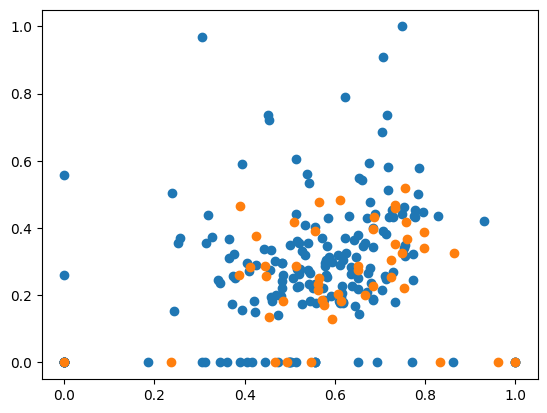

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler

data = pd.read_csv('data.csv')

X = data[['Health_care']]
y = data['Cost_of_Living']

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=20)
plt.scatter(X_train, y_train, label='train splitted')
plt.scatter(X_test, y_test, label='test splitted')



In [45]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

y_pred_linear = linear_model.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

print(f"Linear Regression: MSE = {mse_linear}, MAE = {mae_linear}")

Linear Regression: MSE = 0.024198954315920052, MAE = 0.11935579483460328


In [50]:

degree = 2
poly = PolynomialFeatures(degree=degree)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)  # Note: use transform() for test data

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

y_pred_poly = poly_model.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
mae_poly = mean_absolute_error(y_test, y_pred_poly)

print(f"Polynomial Regression: MSE = {mse_poly}, MAE = {mae_poly}")

Polynomial Regression: MSE = 0.021009541507877566, MAE = 0.1146751806470145


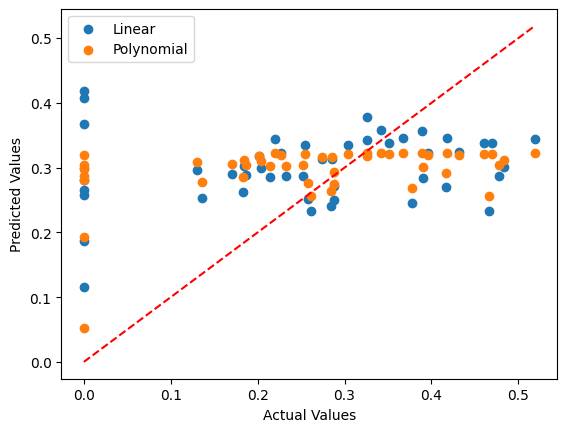

In [51]:
plt.scatter(y_test, y_pred_linear, label='Linear')
plt.scatter(y_test, y_pred_poly, label='Polynomial')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()